# COMP3010J - Machine Learning

## Yuyang Wang 19206226

# Import Necessary packages

In [4]:
# data analysis and preparing
import pandas as pd
import math
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# from tqdm import tqdm

# tqdm.pandas()

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.metrics import auc, roc_curve, confusion_matrix, f1_score

# Read data file
Here we read the data as a DataFrame

In [5]:
df = pd.read_csv('kickstarter201801.csv')

In [6]:
df.head() # Take a look at first 5 lines

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Check whether there exist missing data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                378661 non-null  int64  
 1   name                              378657 non-null  object 
 2   category                          378661 non-null  object 
 3   main_category                     378661 non-null  object 
 4   currency                          378661 non-null  object 
 5   deadline                          378661 non-null  object 
 6   goal                              378661 non-null  float64
 7   launched                          378661 non-null  object 
 8   pledged                           378661 non-null  float64
 9   state                             378661 non-null  object 
 10  backers                           378661 non-null  int64  
 11  country                           378661 non-null  o

# Here we found there do exist missing data, I will deal with this problem later.

## Data analysis

In [8]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [9]:
df.describe(percentiles=[.1, .2, .6, .7, .8, .9, .95, .99])

,ID,goal,pledged,backers,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
10%,2.164103e+08,6.750000e+02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.000000e+02
20%,4.312514e+08,1.500000e+03,1.000000e+01,1.000000,1.410000e+00,1.023000e+01,1.500000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
60%,1.290010e+09,9.000000e+03,1.411010e+03,23.000000,9.580000e+02,1.415000e+03,8.560180e+03
70%,1.502856e+09,1.250000e+04,2.925000e+03,42.000000,2.085000e+03,2.909000e+03,1.242221e+04
80%,1.716708e+09,2.080000e+04,5.729000e+03,76.000000,4.422754e+03,5.665220e+03,2.000000e+04


In [10]:
# Only categorical features
df.describe(include=['O'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375722,159,15,14,3164,347035,6,23
top,#NAME?,Product Design,Film & Video,USD,08/08/2014,20/06/2017 16:00,failed,US
freq,43,22314,63585,295365,705,15,197719,292627


# Correlation

In [11]:
df[['main_category', 'usd pledged']].groupby(['main_category'], as_index=False).mean().sort_values(by='usd pledged', ascending=False)

,main_category,usd pledged
4,Design,17033.026574
8,Games,16306.194882
13,Technology,15457.306964
6,Film & Video,5532.577810
1,Comics,5344.016859
5,Fashion,4279.731233
7,Food,4209.934253
14,Theater,3554.355087
10,Music,3356.870405
3,Dance,2962.990149


In [12]:
df[['main_category', 'usd_goal_real_at_start']].groupby(['main_category'], as_index=False).mean().sort_values(by='usd_goal_real_at_start', ascending=False)

,main_category,usd_goal_real_at_start
13,Technology,102288.542838
9,Journalism,86003.395014
6,Film & Video,82625.292253
7,Food,49039.620802
8,Games,44923.741408
4,Design,41871.388591
0,Art,39198.575879
14,Theater,27088.321275
12,Publishing,24798.240254
5,Fashion,22412.409361


# Visualizing data

# Overview of our target feature

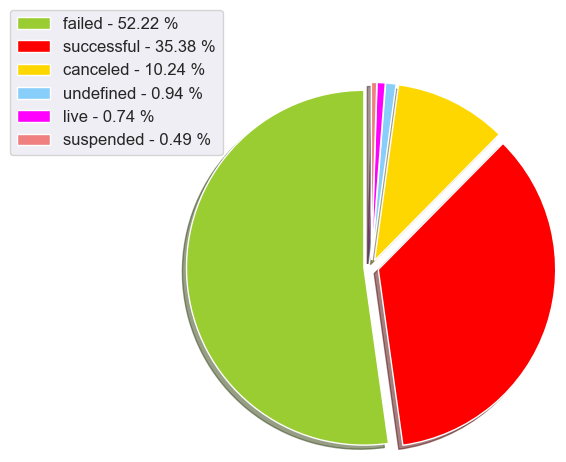

In [13]:
state_value_counts = df['state'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

# Unbalance data

# Firstly we take a look at `goal` and `pledged`

Here `goal` and `pledged` are unconverted value (i.e. in their own currency)

<AxesSubplot: xlabel='state', ylabel='pledged'>

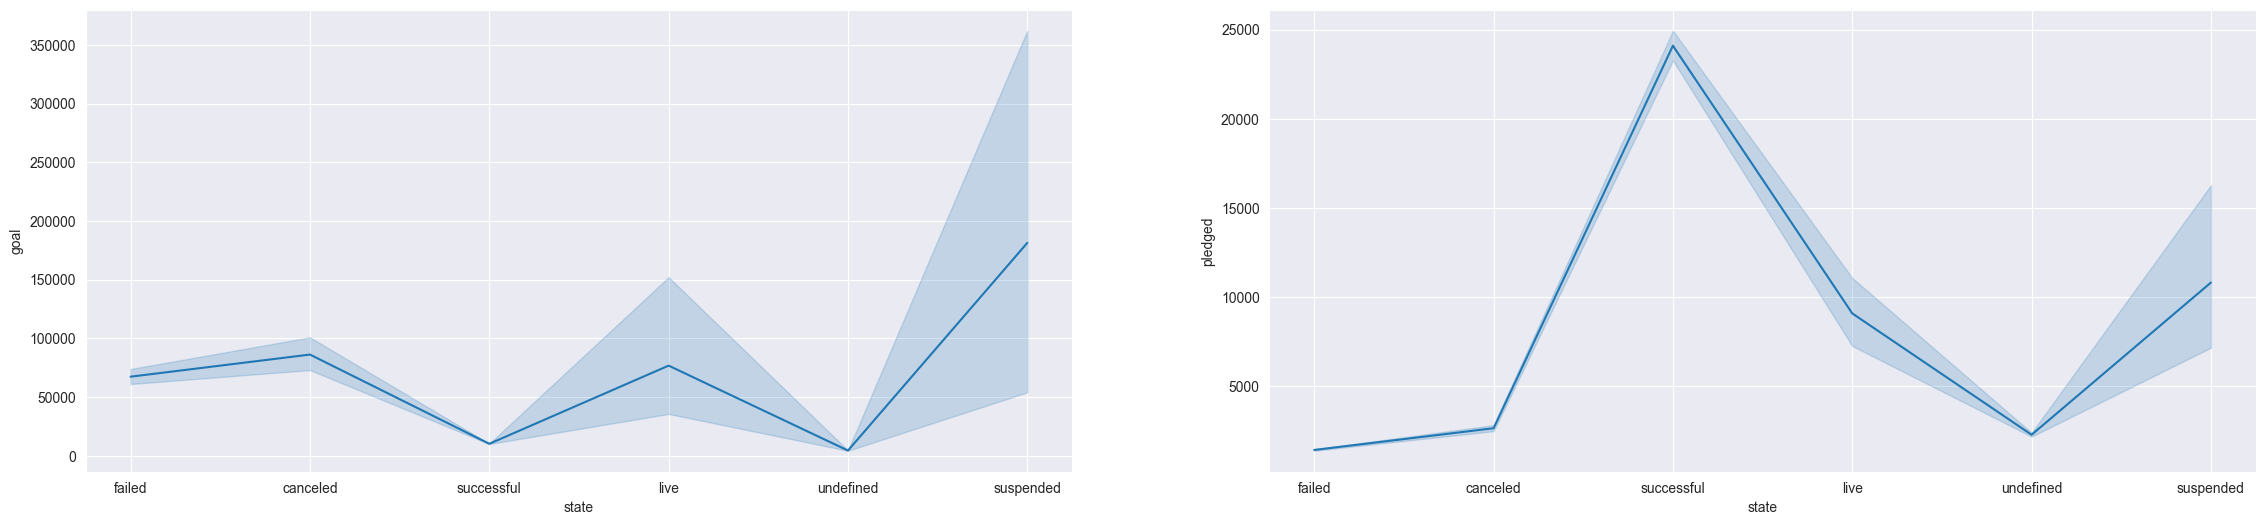

In [14]:
fig = plt.figure(figsize=(28,6))

ax = fig.add_subplot(121)
sns.lineplot(x='state', y='goal', data=df, ax=ax)

ax = fig.add_subplot(122)
sns.lineplot(x='state', y='pledged', data=df, ax=ax)


# From the graph we know that...

Here, we know that the goal of a kickstarter project is really high. Then, this project will be **suspended**.
So `goal` column is a good descriptive feature for us to determine whether a project will get **suspend** or not.

# What if we convert this to USD ?

 I found the following information from the Internet.

* `usd_goal_real_at_start`: conversion in US dollars of the goal column (conversion from Fixer.io API).
* `usd pledged`: conversion in US dollars of the pledged column (conversion done by kickstarter).
* `usd_pledged_realised at deadline`: conversion in US dollars of the pledged column (conversion from Fixer.io API).


<AxesSubplot: xlabel='state', ylabel='usd_pledged_realised at deadline'>

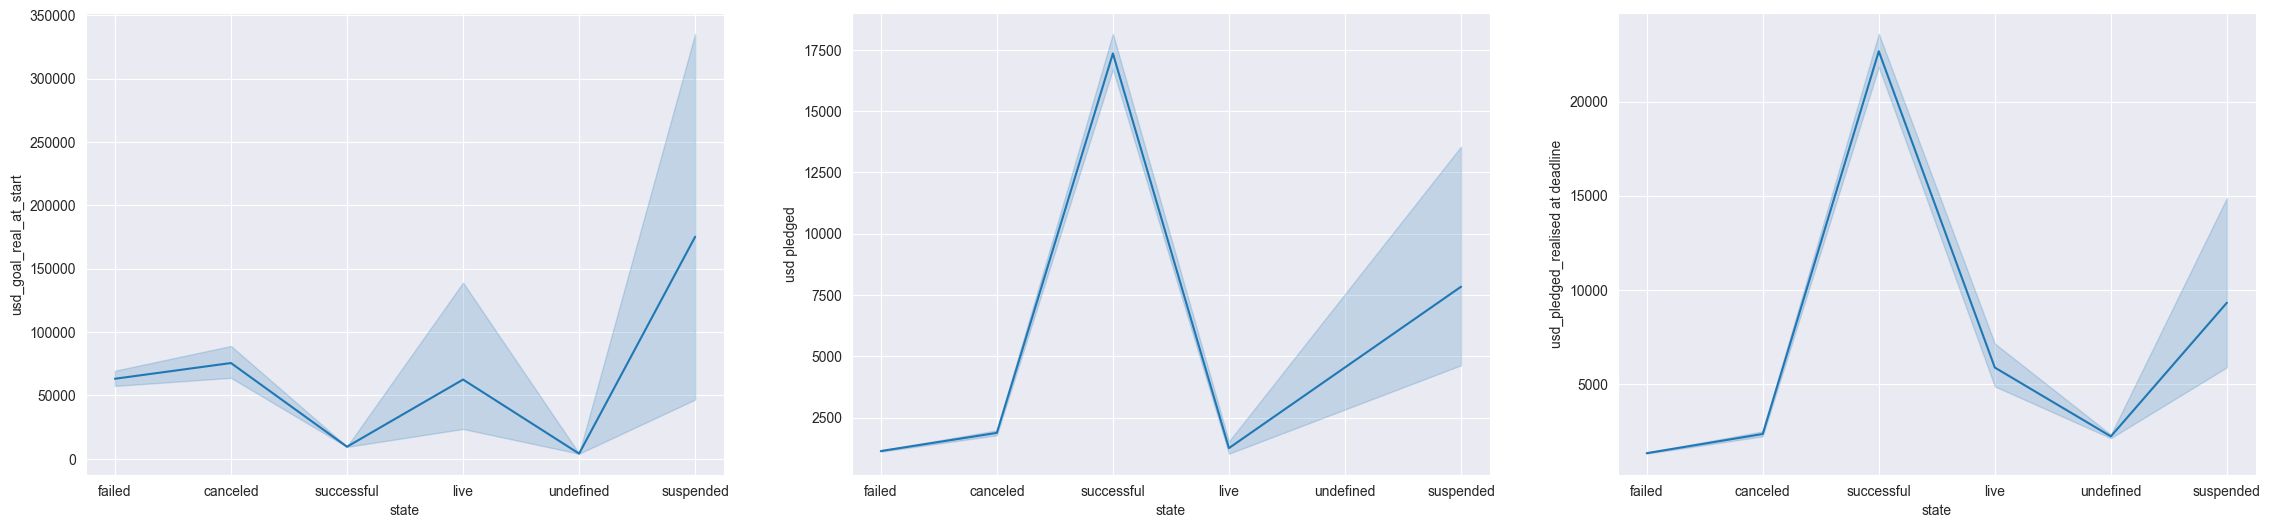

In [15]:
fig = plt.figure(figsize=(28,6))

ax = fig.add_subplot(131)
sns.lineplot(x='state', y='usd_goal_real_at_start', data=df, ax=ax) # Converted by third-party API (goal)

ax = fig.add_subplot(132)
sns.lineplot(x='state', y='usd pledged', data=df, ax=ax) # Converted by kickstarter (pledged)

ax = fig.add_subplot(133)
sns.lineplot(x='state', y='usd_pledged_realised at deadline', data=df, ax=ax) #  Converted by third-party API (pledged)

# Why dose this dataset contains both third-party API converted pledged value and kickstarter Converted?
We need to take a look at the value between:
* `pledged` (unconverted pledged value)
* `usd pledged` (pledged value converted by kickstarter)
* `usd_pledged_realised at deadline` (pledged value by third-party API)

<AxesSubplot: xlabel='state', ylabel='usd_pledged_realised at deadline'>

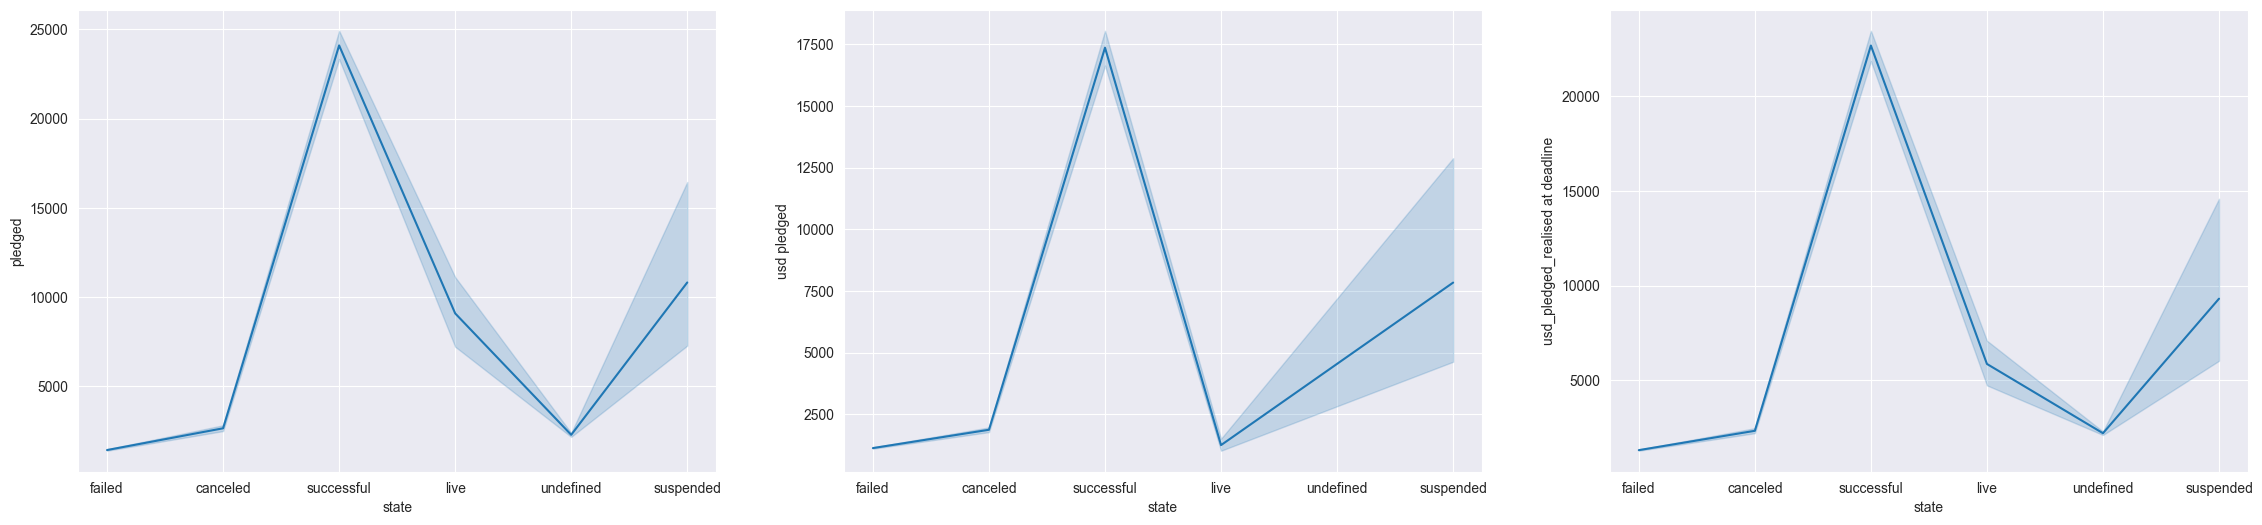

In [16]:
fig = plt.figure(figsize=(28,6))

ax = fig.add_subplot(131)
sns.lineplot(x='state', y='pledged', data=df, ax=ax) # Converted by third-party API (goal)

ax = fig.add_subplot(132)
sns.lineplot(x='state', y='usd pledged', data=df, ax=ax) # Converted by kickstarter (pledged)

ax = fig.add_subplot(133)
sns.lineplot(x='state', y='usd_pledged_realised at deadline', data=df, ax=ax) #  Converted by third-party API (pledged)

# From the figure we can know that...

* The characteristic of `pledged` and `usd_pledged_realised at deadline` are quite similar
* However, the figure of `usd pledged` is **significantly** different from these two figures

We need to take some sample to find out why this is the case.

In [17]:
df.head(10) # Take head 10 sample

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_realised at deadline,usd_goal_real_at_start
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,01/04/2016,50000.0,26/02/2016 13:38,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,21/12/2014,1000.0,01/12/2014 18:30,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,17/03/2016,25000.0,01/02/2016 20:05,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,29/05/2014,125000.0,24/04/2014 18:14,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,10/08/2014,65000.0,11/07/2014 21:55,6240.57,canceled,43,US,6240.57,6240.57,65000.00


# Let's take 1000003930 (ID) as an example

In [18]:
print(f"The 'currency'                         of this project: {df[df['ID'] == 1000003930]['currency'][1]}")
print(f"The 'pledged'                          of this project: {df[df['ID'] == 1000003930]['pledged'][1]}")
print(f"The 'usd pledged'                      of this project: {df[df['ID'] == 1000003930]['usd pledged'][1]}")
print(f"The 'usd_pledged_realised at deadline' of this project: {df[df['ID'] == 1000003930]['usd_pledged_realised at deadline'][1]}")

The 'currency'                         of this project: USD
The 'pledged'                          of this project: 2421.0
The 'usd pledged'                      of this project: 100.0
The 'usd_pledged_realised at deadline' of this project: 2421.0


# Here we found a problem...

Here the `currency` of this project is "USD", so the value in column `pledged` is "USD", after conversion, the value should not be changed.

However, in the `usd pledge` column, this value got be changed to 100.0, which is incorrect.

The value of `usd_pledged_realised at deadline` is the equal to `pledged`, which is right.

## So...How many lines contain error like this?

Let's try "USD" and find out!

In [19]:
print(f"\tTotal projects using USD :                                  {len(df[(df['currency'] == 'USD')])}")
print("For the projects using USD as their currency:")
print(f"\t'pledged' equal to 'usd pledged' :                          {len(df[(df['currency'] == 'USD') & (df['pledged'] == df['usd pledged'])])}")
print(f"\t'pledged' not equal to 'usd pledged' :                      {len(df[(df['currency'] == 'USD') & (df['pledged'] != df['usd pledged'])])}")
print(f"\t'pledged' equal to 'usd_pledged_realised at deadline' :     {len(df[(df['currency'] == 'USD') & (df['pledged'] == df['usd_pledged_realised at deadline'])])}")
print(f"\t'pledged' not equal to 'usd_pledged_realised at deadline' : {len(df[(df['currency'] == 'USD') & (df['pledged'] != df['usd_pledged_realised at deadline'])])}")

	Total projects using USD :                                  295365
For the projects using USD as their currency:
	'pledged' equal to 'usd pledged' :                          248784
	'pledged' not equal to 'usd pledged' :                      46581
	'pledged' equal to 'usd_pledged_realised at deadline' :     295365
	'pledged' not equal to 'usd_pledged_realised at deadline' : 0


# So, `usd pledged` is wrong for at least 46581 kickstarter projects!

However, `usd_pledged_realised at deadline` is right.

Which means `usd pledged` should be **dropped**. I will drop this value later.

In [20]:
df.drop(['usd pledged'], inplace=True, axis=1)

# Then we take a look at number of `backers`.

<AxesSubplot: xlabel='state', ylabel='usd_pledged_realised at deadline'>

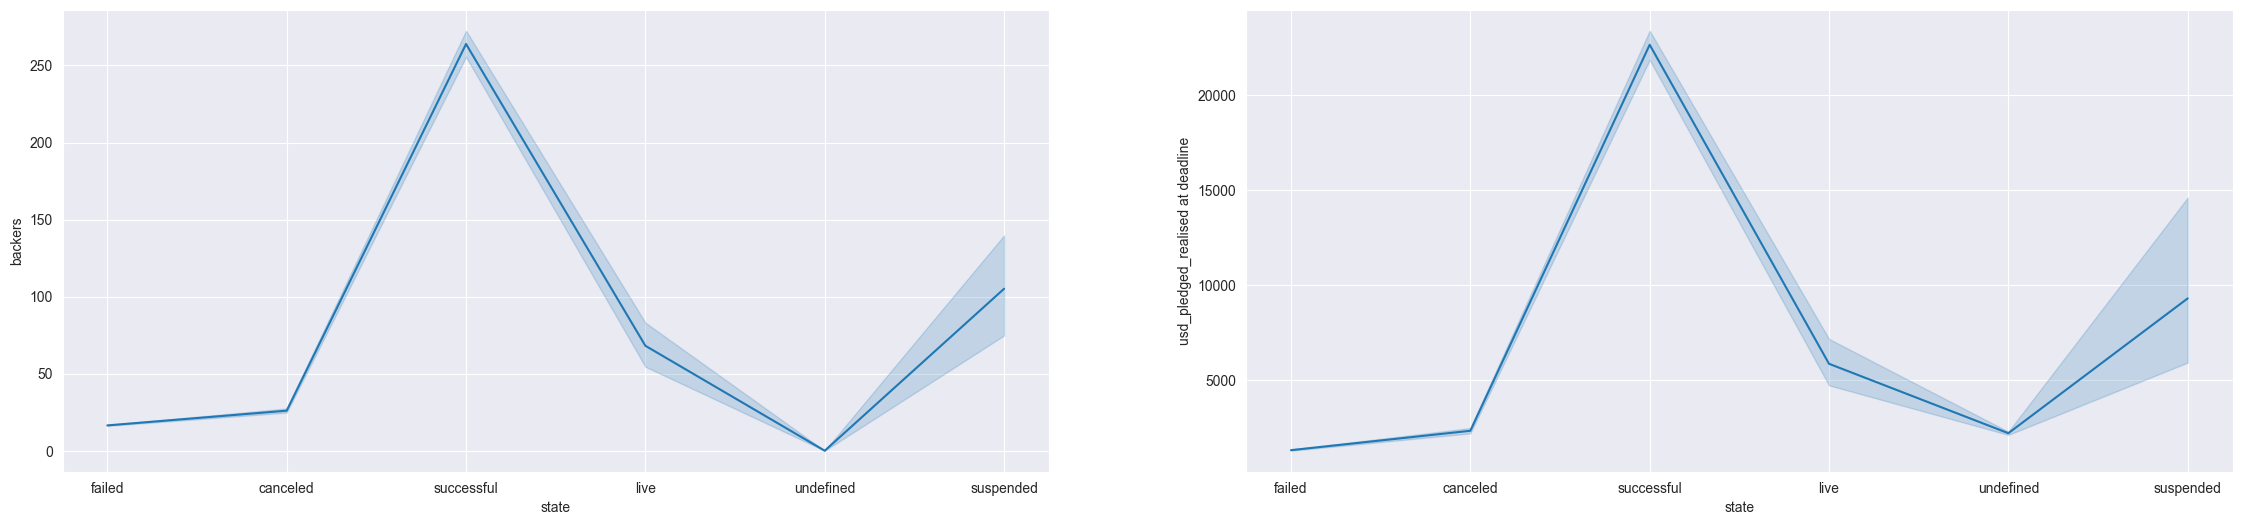

In [21]:
fig = plt.figure(figsize=(28,6))

ax = fig.add_subplot(121)
sns.lineplot(x='state', y='backers', data=df) # Bankers

ax = fig.add_subplot(122)
sns.lineplot(x='state', y='usd_pledged_realised at deadline', data=df, ax=ax) #  Converted by third-party API (pledged)

# From the graph we know...

The overall characteristic of number of `bankers` and `usd_pledged_realised at deadline` are quite similar
**They all reflect the probability of whether a kickstarter project belongs to which class.**

<AxesSubplot: xlabel='state', ylabel='backers'>

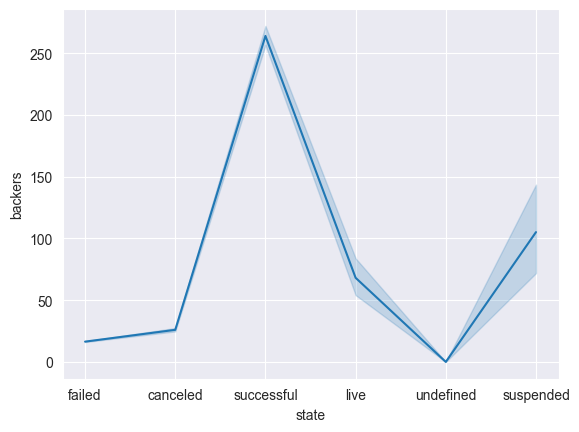

In [22]:
sns.lineplot(x='state', y='backers', data=df)

<AxesSubplot: xlabel='state', ylabel='usd_goal_real_at_start'>

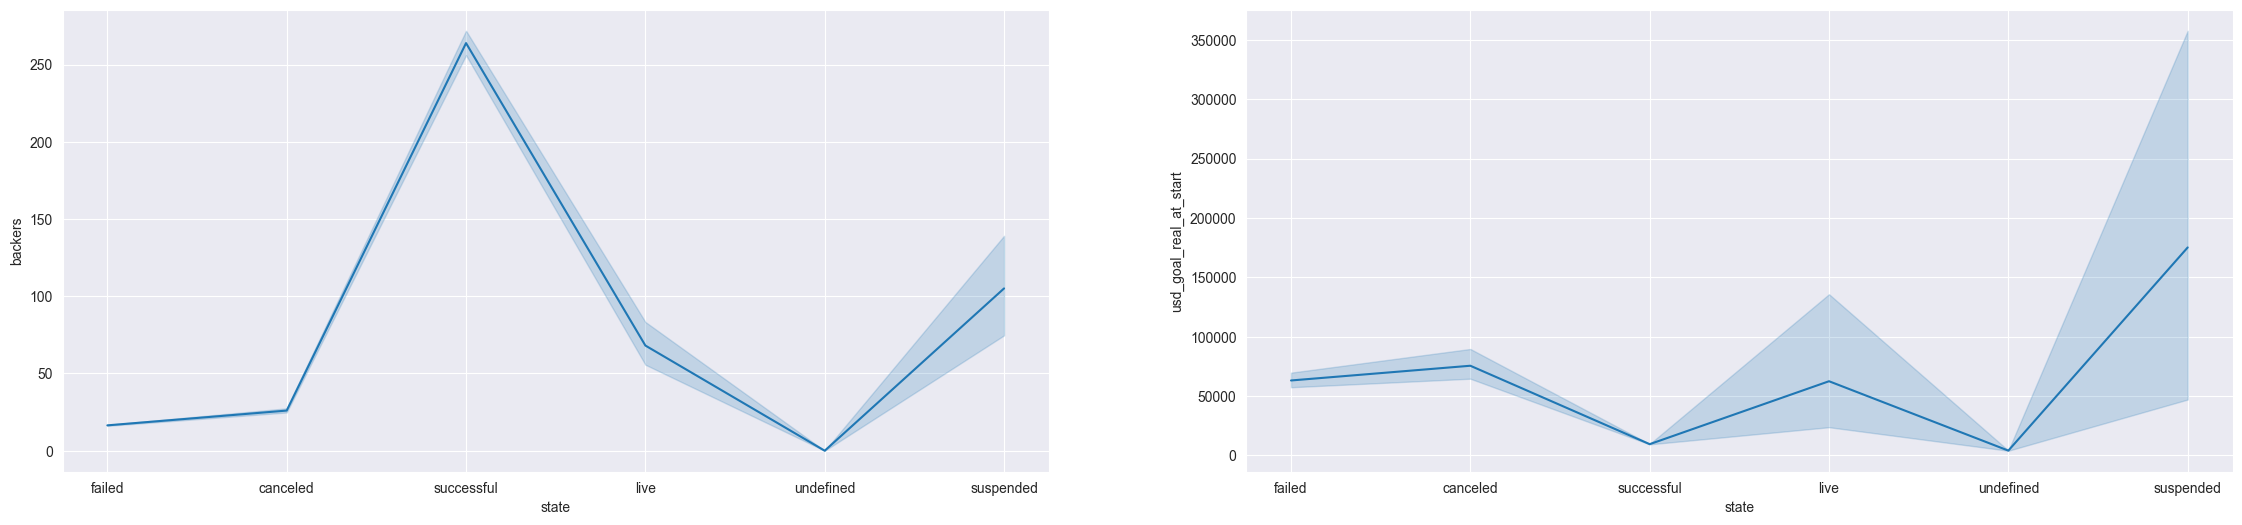

In [23]:
fig = plt.figure(figsize=(28,6))

ax = fig.add_subplot(121)
sns.lineplot(x='state', y='backers', data=df, ax=ax)

ax = fig.add_subplot(122)
sns.lineplot(x='state', y='usd_goal_real_at_start', data=df, ax=ax)

# Dose `category` or `main_category` have effects on the `state` of a kickstarter project?

Firstly, let's check some basic information.

In [24]:
print(f"We have {len(set(df['main_category']))} unique main_category value.")
print(f"We have {len(set(df['category']))} unique category value.")

We have 15 unique main_category value.
We have 159 unique category value.


# Firstly we take a look at main_category

Data is distributed in these main categories, whereas Film & Video take a majority part in this data.

<AxesSubplot: xlabel='main_category', ylabel='Count'>

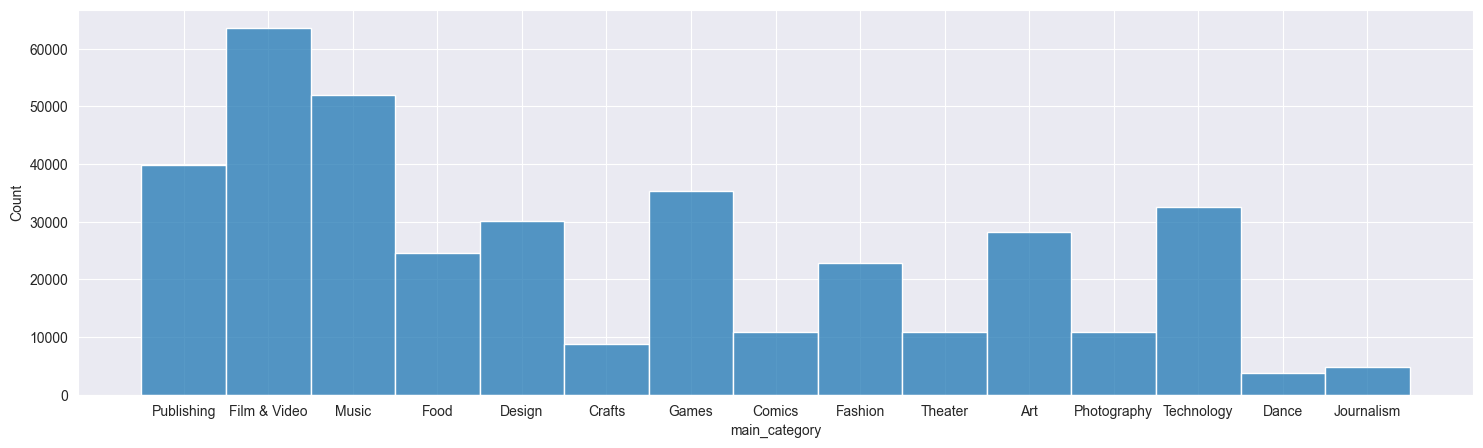

In [25]:
plt.figure(figsize=(18,5)) #adjust the size of plot
sns.histplot(x='main_category', data=df, bins=20, stat='count', multiple='stack')

# The `main_category` is somewhat related to the state of the kickstarter project.

<AxesSubplot: xlabel='main_category', ylabel='Count'>

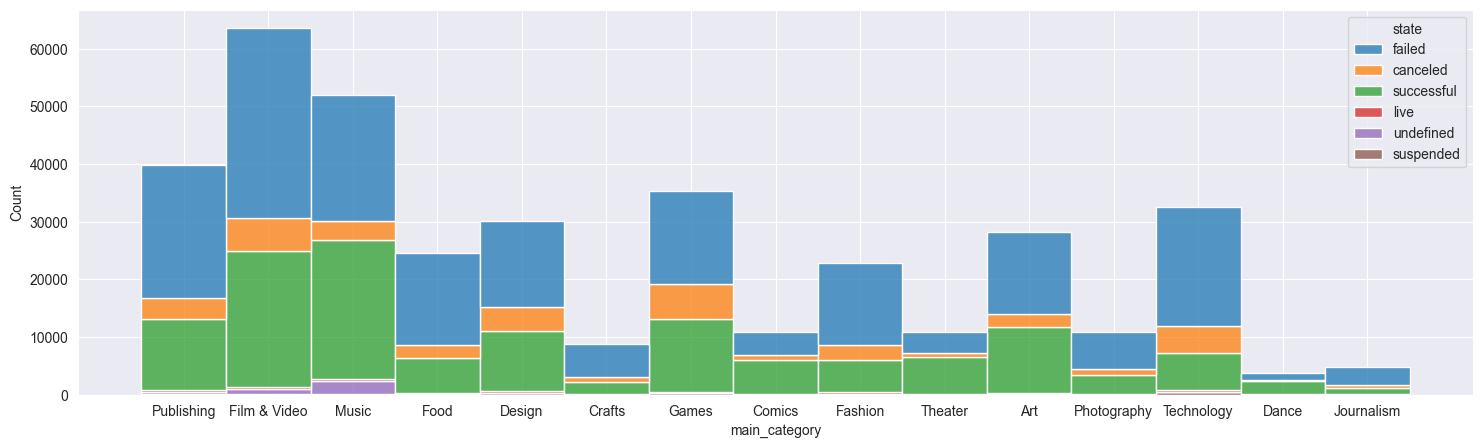

In [26]:
plt.figure(figsize=(18,5)) #adjust the size of plot
sns.histplot(x='main_category', hue="state", data=df, bins=20, stat='count', multiple='stack')

In [27]:
pd.crosstab(df['main_category'], df['state']).div(pd.crosstab(df['main_category'], df['state']).sum(axis=1), axis=0)

state,canceled,failed,live,successful,suspended,undefined
main_category,,,,,,
Art,0.078926,0.501936,0.006891,0.408837,0.003410,0.000000
Comics,0.077826,0.373047,0.007025,0.539976,0.002126,0.000000
Crafts,0.095698,0.647406,0.008628,0.240095,0.008173,0.000000
Dance,0.043259,0.327760,0.004777,0.620488,0.003450,0.000265
Design,0.138078,0.492650,0.010143,0.350848,0.008214,0.000067
Fashion,0.116147,0.621581,0.010957,0.245135,0.006048,0.000131
Film & Video,0.090509,0.517481,0.005221,0.371518,0.001840,0.013431
Food,0.089871,0.649094,0.007479,0.247338,0.006219,0.000000
Games,0.176038,0.454231,0.008146,0.355312,0.006245,0.000028


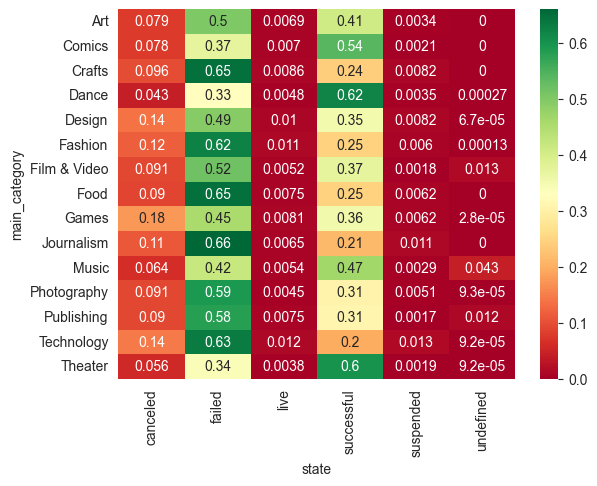

In [28]:
g=sns.heatmap(pd.crosstab(df['main_category'], df['state']).div(pd.crosstab(df['main_category'], df['state']).sum(axis=1), axis=0),annot=True,cmap="RdYlGn")

# From the heatmap we can know that.

* Nearly 63% of Music project goes to undefined state.
* 18% Film & Video, 18% Music project succeed.
* ...

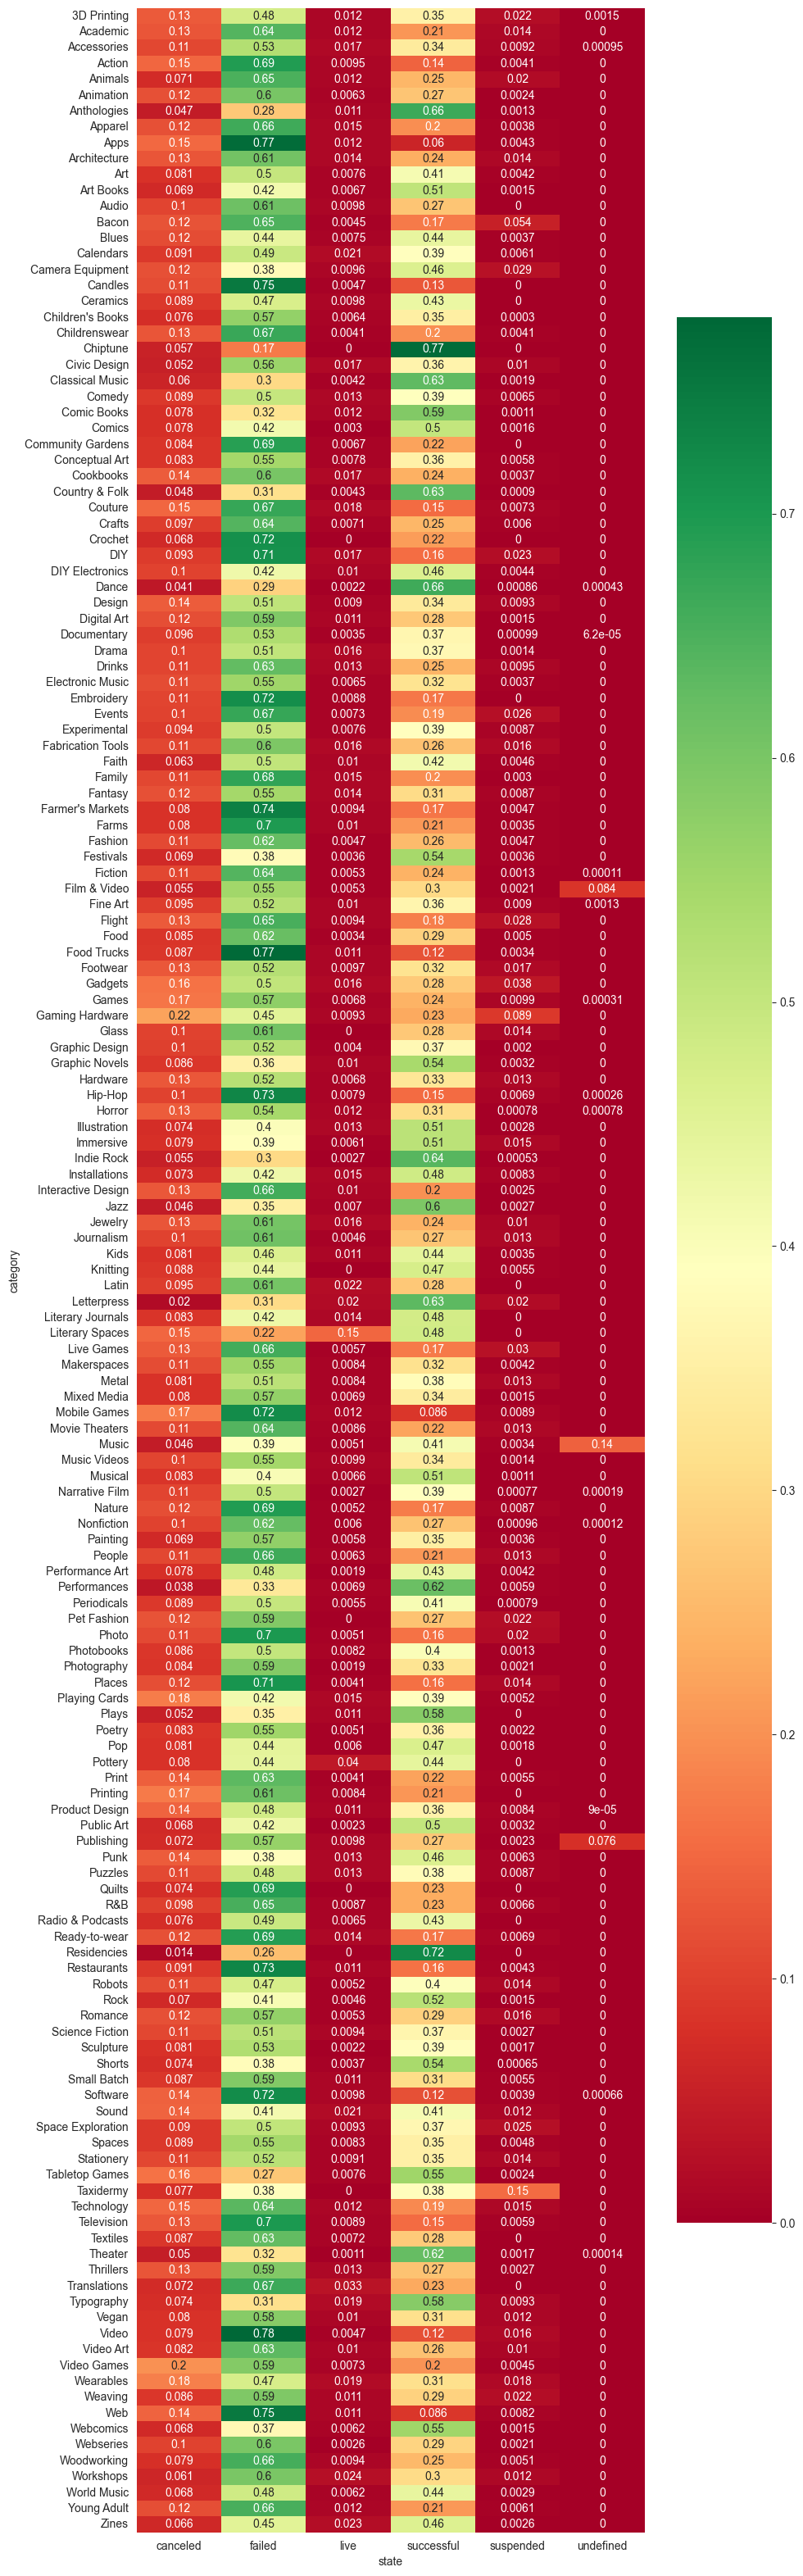

In [29]:
plt.figure(figsize=(10,40)) #adjust the size of plot
g=sns.heatmap(pd.crosstab(df['category'], df['state']).div(pd.crosstab(df['category'], df['state']).sum(axis=1), axis=0),annot=True,cmap="RdYlGn")

# From the graph above we know that both `main_category` and `category` are not good to determine the state of the project.


# Will the length of `name` related to the `state` of a kickstarter project?

We firstly take a look at the distribution of the project name length.

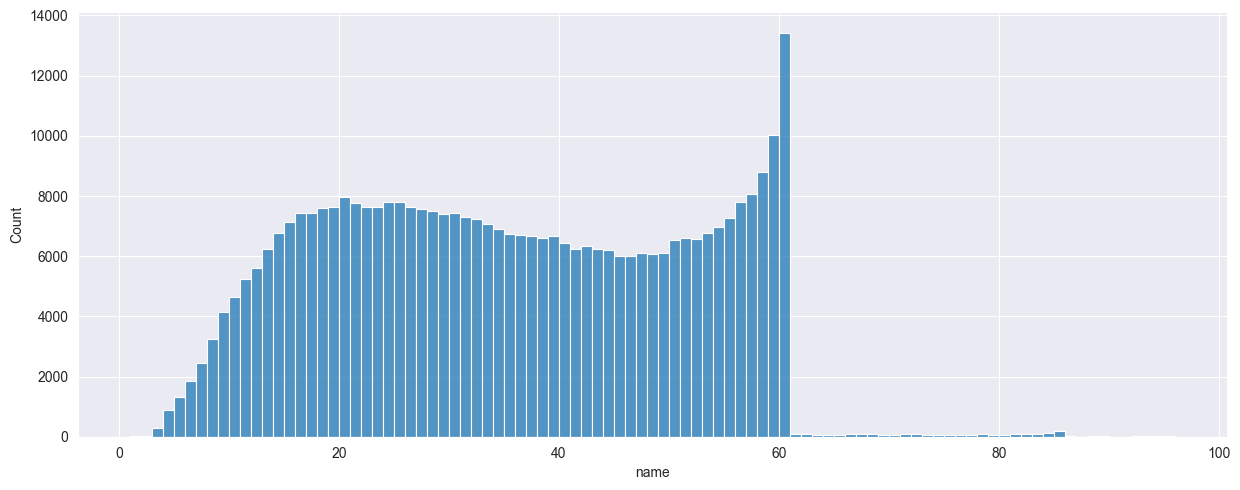

In [30]:
sns.displot(df['name'].apply(lambda x: len(str(x))), binwidth=1, aspect=2.5)

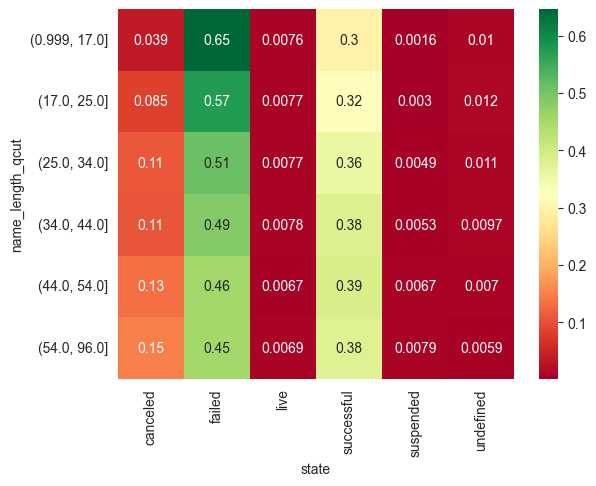

In [31]:
df['name_length'] = df['name'].apply(lambda x: len(str(x)))
df['name_length_qcut'] = pd.qcut(df['name_length'], 6)
g=sns.heatmap(pd.crosstab(df['name_length_qcut'], df['state']).div(pd.crosstab(df['name_length_qcut'], df['state']).sum(axis=1), axis=0),annot=True,cmap="RdYlGn")

In [32]:
df['name_length_qcut'].value_counts()

(25.0, 34.0]     66065
(34.0, 44.0]     64821
(0.999, 17.0]    64725
(44.0, 54.0]     63761
(17.0, 25.0]     61799
(54.0, 96.0]     57490
Name: name_length_qcut, dtype: int64

# Here are the things that we found

* If the length of a project's name is too short, then this project is more likely to fail
* As the length of a project's name goes greater, this project is more likely to be canceled.

So, we keep the field `name_length` and `name_length_qcut` and drop `name` field.

In [33]:
df.drop("name", inplace=True, axis=1)

# Dose the currency affects the state of the project?

In [34]:
df['currency'].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

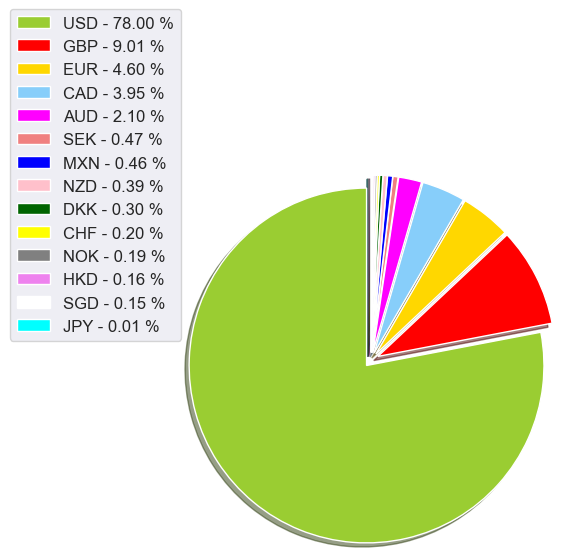

In [35]:
state_value_counts = df['currency'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

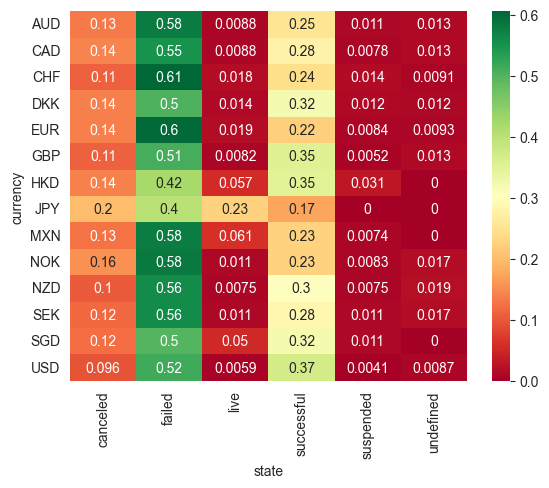

In [36]:
g=sns.heatmap(pd.crosstab(df['currency'], df['state']).div(pd.crosstab(df['currency'], df['state']).sum(axis=1), axis=0),annot=True,cmap="RdYlGn")

# From the heatmap we know that the currency they use does not have a significant effect on the state of a project

So, we drop currency column.

# When it comes to date, we add duration field.

In [37]:
df["duration"] = (pd.to_datetime(df.deadline, format="%d/%m/%Y") - pd.to_datetime(df.launched,
                                                                                  format="%d/%m/%Y %H:%M")).apply(
    lambda x: x.days)

<AxesSubplot: xlabel='state', ylabel='duration'>

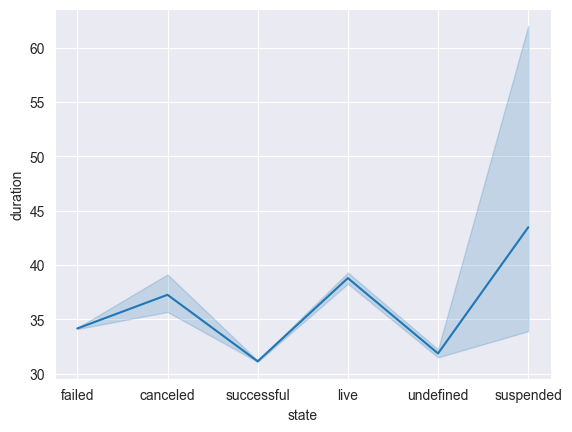

In [38]:
sns.lineplot(x='state', y='duration', data=df)

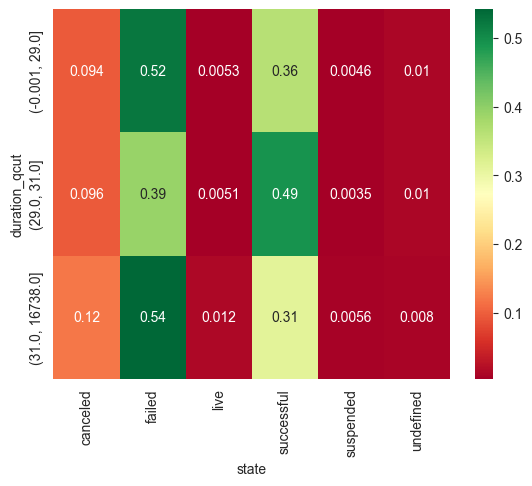

In [39]:
df['duration_qcut'] = pd.qcut(df['duration'], 3)
g=sns.heatmap(pd.crosstab(df['duration_qcut'], df['state']).div(pd.crosstab(df['duration_qcut'], df['state']).sum(axis=1), axis=0),annot=True,cmap="RdYlGn")

# Then we can drop `launched` and `deadline` column.

In [40]:
df.drop(['launched', 'deadline'], inplace=True, axis=1)

# From the heatmap we know that...

* If the duration of a project is too short or too long, then this project is more likely failed.


# Instead of using `usd_pledged_realised at deadline` and `usd_goal_real_at_start` directly, we add a `completeRatio` field.

In [41]:
df["completeRatio"] = df['usd_pledged_realised at deadline'] / df['usd_goal_real_at_start']

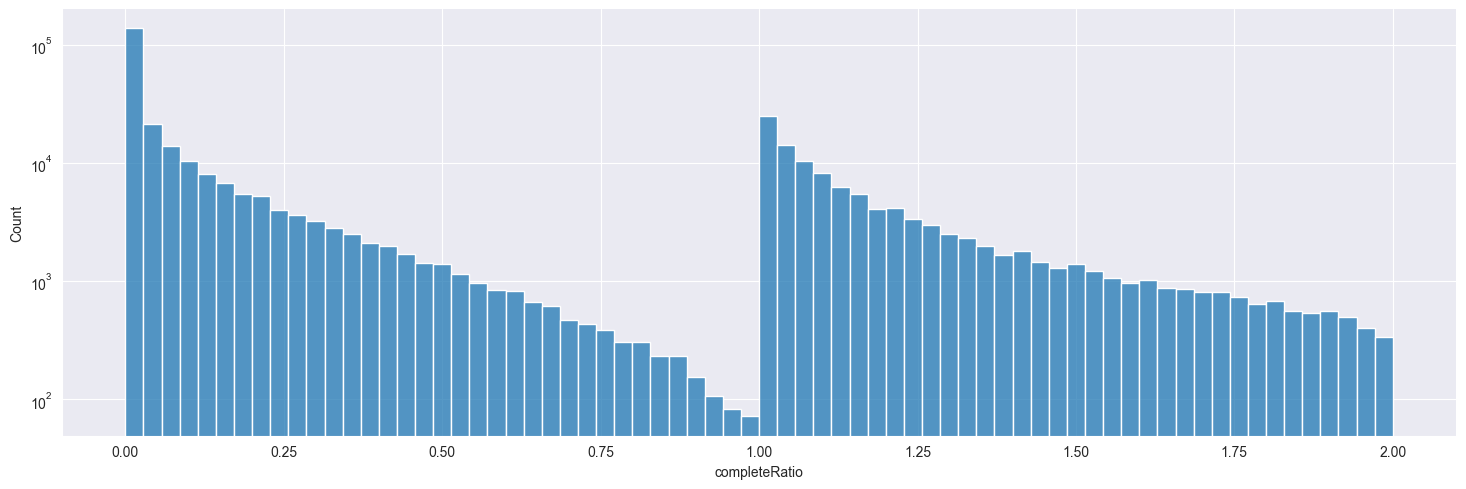

In [42]:
ax = sns.displot(df[df['completeRatio'] < 2]['completeRatio'], aspect=3)
ax.set(yscale="log")

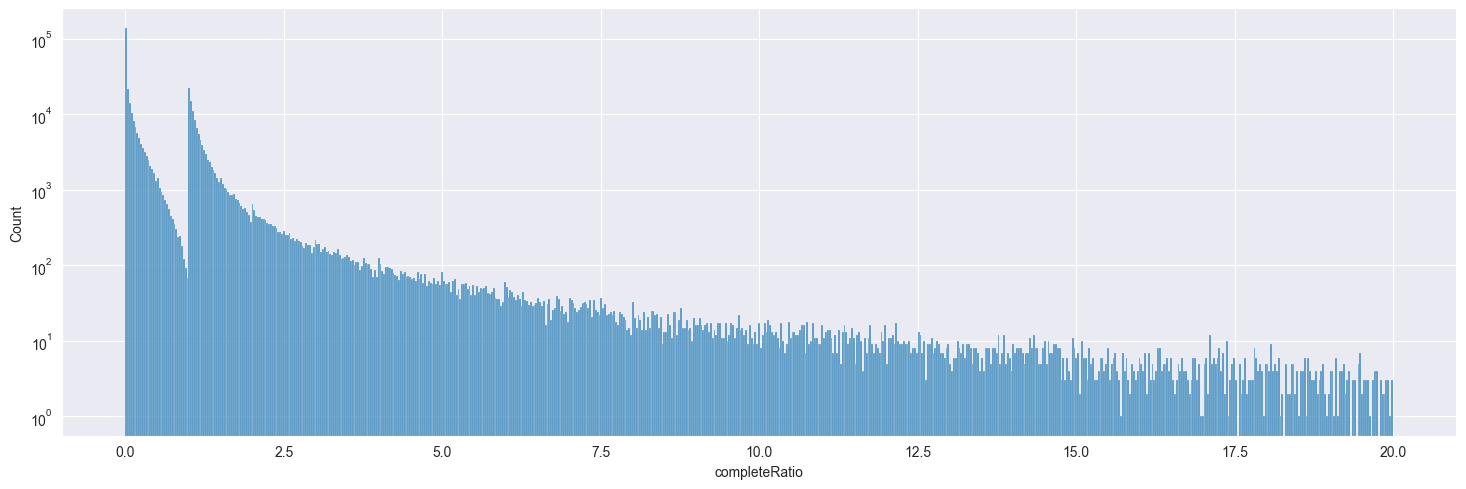

In [43]:
ax = sns.displot(df[df['completeRatio'] < 20]['completeRatio'], aspect=3)
ax.set(yscale="log")

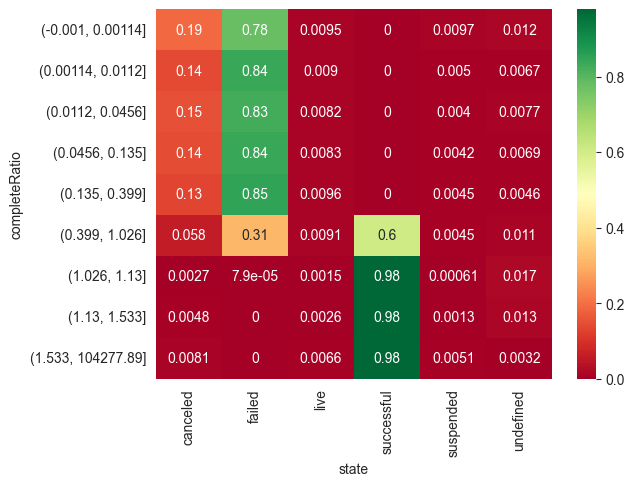

In [44]:
g=sns.heatmap(pd.crosstab(pd.qcut(df['completeRatio'], 10, duplicates='drop'), df['state']).div(pd.crosstab(pd.qcut(df['completeRatio'], 10, duplicates='drop'), df['state']).sum(axis=1), axis=0),annot=True,cmap="RdYlGn")

# Dose `country` have effects on `state`?

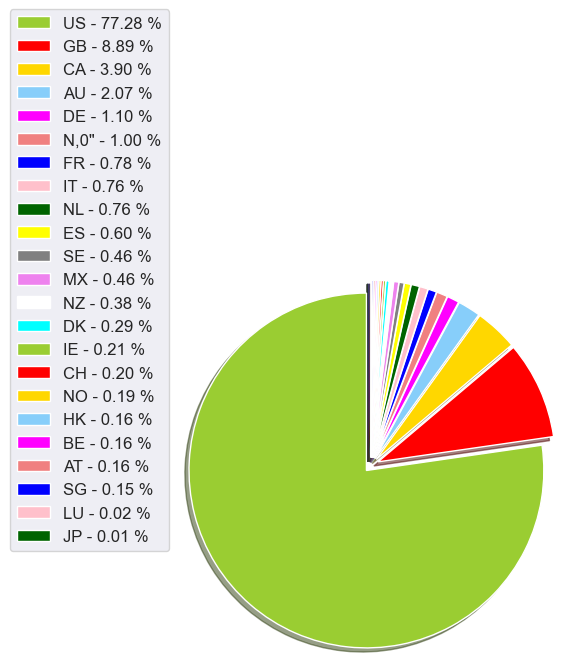

In [45]:
state_value_counts = df['country'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

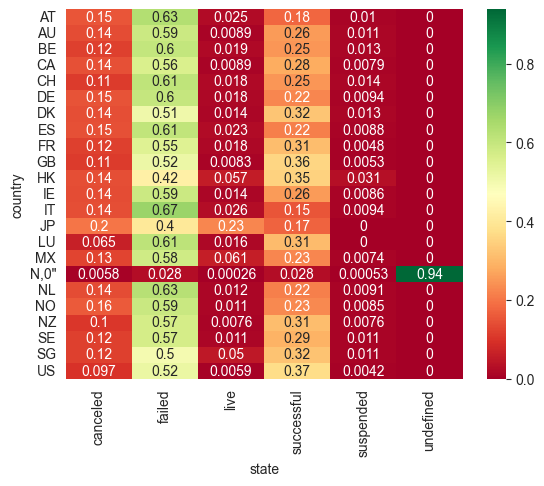

In [46]:
g=sns.heatmap(pd.crosstab(df['country'], df['state']).div(pd.crosstab(df['country'], df['state']).sum(axis=1), axis=0),annot=True,cmap="RdYlGn")

# Check null values

In [47]:
df.isnull().sum()

ID                                  0
category                            0
main_category                       0
currency                            0
goal                                0
pledged                             0
state                               0
backers                             0
country                             0
usd_pledged_realised at deadline    0
usd_goal_real_at_start              0
name_length                         0
name_length_qcut                    0
duration                            0
duration_qcut                       0
completeRatio                       0
dtype: int64

In [48]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

ID                                  0
category                            0
main_category                       0
currency                            0
goal                                0
pledged                             0
state                               0
backers                             0
country                             0
usd_pledged_realised at deadline    0
usd_goal_real_at_start              0
name_length                         0
name_length_qcut                    0
duration                            0
duration_qcut                       0
completeRatio                       0
dtype: int64

In [49]:
df.head()

,ID,category,main_category,currency,goal,pledged,state,backers,country,usd_pledged_realised at deadline,usd_goal_real_at_start,name_length,name_length_qcut,duration,duration_qcut,completeRatio
0,1000002330,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,1533.95,31,"(25.0, 34.0]",58,"(31.0, 16738.0]",0.000000
1,1000003930,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,2421.0,30000.00,45,"(44.0, 54.0]",59,"(31.0, 16738.0]",0.080700
2,1000004038,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,45000.00,14,"(0.999, 17.0]",44,"(31.0, 16738.0]",0.004889
3,1000007540,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,5000.00,49,"(44.0, 54.0]",29,"(-0.001, 29.0]",0.000200
4,1000011046,Film & Video,Film & Video,USD,19500.0,1283.0,canceled,14,US,1283.0,19500.00,58,"(54.0, 96.0]",55,"(31.0, 16738.0]",0.065795


# Before actually take the data to the models, lets try Univariate selection

In [50]:
df.head()

,ID,category,main_category,currency,goal,pledged,state,backers,country,usd_pledged_realised at deadline,usd_goal_real_at_start,name_length,name_length_qcut,duration,duration_qcut,completeRatio
0,1000002330,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,1533.95,31,"(25.0, 34.0]",58,"(31.0, 16738.0]",0.000000
1,1000003930,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,2421.0,30000.00,45,"(44.0, 54.0]",59,"(31.0, 16738.0]",0.080700
2,1000004038,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,45000.00,14,"(0.999, 17.0]",44,"(31.0, 16738.0]",0.004889
3,1000007540,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,5000.00,49,"(44.0, 54.0]",29,"(-0.001, 29.0]",0.000200
4,1000011046,Film & Video,Film & Video,USD,19500.0,1283.0,canceled,14,US,1283.0,19500.00,58,"(54.0, 96.0]",55,"(31.0, 16738.0]",0.065795


# Transform Category

In [62]:
def getTransformTable(colName, data):
    TransformTableData = {}
    stateSetData = set(data[colName])
    for index, i in enumerate(stateSetData):
        TransformTableData[i] = index
    return TransformTableData
backers_qcut = pd.qcut(df['backers'], 6)
usd_pledged_realised_at_deadline_qcut = pd.qcut(df['usd_pledged_realised at deadline'], 7)
usd_goal_real_at_start_qcut = pd.qcut(df['usd_goal_real_at_start'], 10)
completeRatio_qcut = pd.qcut(df['completeRatio'], 7)
categoricalDf = pd.concat(
    [
        backers_qcut,
        usd_pledged_realised_at_deadline_qcut,
        usd_goal_real_at_start_qcut,
        completeRatio_qcut]
    , axis=1)

categoricalDf.head()
num_encode = {
    'backers': getTransformTable('backers', categoricalDf),
    'usd_pledged_realised at deadline': getTransformTable('usd_pledged_realised at deadline', categoricalDf),
    'usd_goal_real_at_start': getTransformTable('usd_goal_real_at_start', categoricalDf),
    'completeRatio': getTransformTable('completeRatio', categoricalDf)
}

# Do Transformation
categoricalDf.replace(num_encode, inplace=True)
categoricalDf.head()

num_encode = {
    'category': getTransformTable('category', df),
    'state': getTransformTable('state', df),
    'main_category': getTransformTable('main_category', df),
    'currency': getTransformTable('currency', df),
    'country': getTransformTable('country', df),
    'name_length_qcut': getTransformTable('name_length_qcut', df),
    'duration_qcut': getTransformTable('duration_qcut', df)
}

# Do Transformation
df.replace(num_encode, inplace=True)

In [63]:
df.head()

,ID,category,main_category,currency,goal,pledged,state,backers,country,usd_pledged_realised at deadline,usd_goal_real_at_start,name_length,name_length_qcut,duration,duration_qcut,completeRatio
0,1000002330,135,9,9,1000.0,0.0,0,0,14,0.0,1533.95,31,3,58,0,0.000000
1,1000003930,106,5,1,30000.0,2421.0,0,15,18,2421.0,30000.00,45,2,59,0,0.080700
2,1000004038,106,5,1,45000.0,220.0,0,3,18,220.0,45000.00,14,1,44,0,0.004889
3,1000007540,108,10,1,5000.0,1.0,0,1,18,1.0,5000.00,49,2,29,1,0.000200
4,1000011046,104,5,1,19500.0,1283.0,5,14,18,1283.0,19500.00,58,4,55,0,0.065795


# Feature Selection

# Normalize data

In [67]:
continueiousFeatures = df[['goal', 'pledged', 'backers', 'usd_pledged_realised at deadline', 'usd_goal_real_at_start', 'name_length', 'duration', 'completeRatio']]
categoricalFeatures = pd.concat([df[['category', 'main_category', 'currency', 'country', 'name_length_qcut', 'duration_qcut']], categoricalDf], axis=1)
targetFeature = df['state']

In [68]:
continueiousFeatures.head()

,goal,pledged,backers,usd_pledged_realised at deadline,usd_goal_real_at_start,name_length,duration,completeRatio
0,1000.0,0.0,0,0.0,1533.95,31,58,0.000000
1,30000.0,2421.0,15,2421.0,30000.00,45,59,0.080700
2,45000.0,220.0,3,220.0,45000.00,14,44,0.004889
3,5000.0,1.0,1,1.0,5000.00,49,29,0.000200
4,19500.0,1283.0,14,1283.0,19500.00,58,55,0.065795


In [69]:
categoricalFeatures.head()

,category,main_category,currency,country,name_length_qcut,duration_qcut,backers,usd_pledged_realised at deadline,usd_goal_real_at_start,completeRatio
0,135,9,9,14,3,0,3,2,6,2
1,106,5,1,18,2,0,2,4,5,6
2,106,5,1,18,1,0,0,0,5,3
3,108,10,1,18,2,1,3,2,3,3
4,104,5,1,18,4,0,2,4,1,6


In [70]:
targetFeature.head()

0    0
1    0
2    0
3    0
4    5
Name: state, dtype: int64

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(continueiousFeatures), columns=continueiousFeatures.columns, index=continueiousFeatures.index)
normalized_df.head()

,goal,pledged,backers,usd_pledged_realised at deadline,usd_goal_real_at_start,name_length,duration,completeRatio
0,0.000010,0.000000e+00,0.000000,0.000000e+00,0.000009,0.315789,0.003465,0.000000e+00
1,0.000300,1.190325e-04,0.000068,1.190325e-04,0.000180,0.463158,0.003525,7.738937e-07
2,0.000450,1.081666e-05,0.000014,1.081666e-05,0.000270,0.136842,0.002629,4.688327e-08
3,0.000050,4.916666e-08,0.000005,4.916666e-08,0.000030,0.505263,0.001733,1.917952e-09
4,0.000195,6.308082e-05,0.000064,6.308082e-05,0.000117,0.600000,0.003286,6.309571e-07


# Perform Univariate selection - Select Continuous Features

In [58]:
from sklearn.feature_selection import SelectKBest, f_classif
data = continueiousFeatures
target = targetFeature

best_features = SelectKBest(score_func=f_classif, k=6).fit(data, target)

dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(data.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))

                              Specs        Score
5                       name_length  1818.847051
2                           backers  1290.029366
1                           pledged   961.902999
3  usd_pledged_realised at deadline   944.555307
6                          duration    75.938074
0                              goal    51.995245
4            usd_goal_real_at_start    46.385665
7                     completeRatio    16.667181


# Tree-based feature selection - Select Continuous Features

<AxesSubplot: >

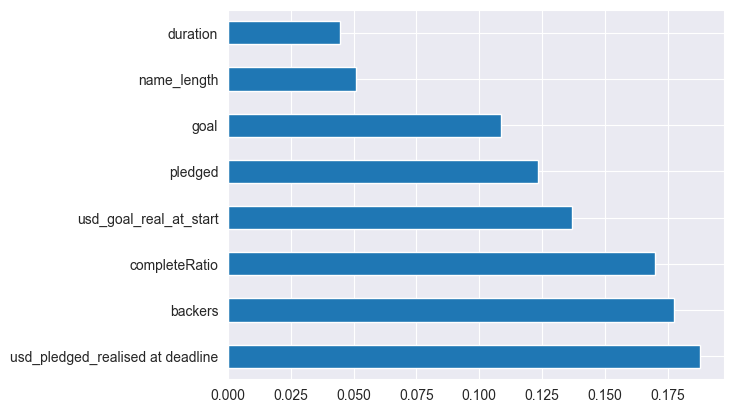

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

tree = ExtraTreesClassifier()
tree.fit(data, target)

df_feature_importances = pd.Series(tree.feature_importances_, index=data.columns)
df_feature_importances.nlargest(10).plot(kind='barh')

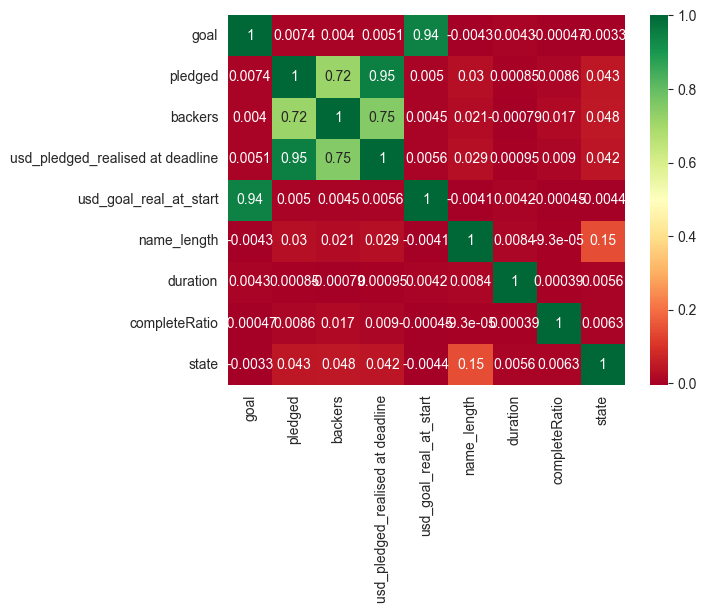

In [60]:
combine = pd.concat([data, target], axis=1)
corr_mat = combine.corr()

# plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

In [89]:
# Mutual information (MI) - Select Categorical Features
from sklearn.feature_selection import mutual_info_classif

data = mutual_info_classif(categoricalFeatures, targetFeature)


In [91]:
for i in range(len(data)):
    print(categoricalFeatures.columns[i], list(data)[i])

category 0.07791854989736602
main_category 0.04198568840257422
currency 0.014363538752923732
country 0.087119127091843
name_length_qcut 0.01932352016080352
duration_qcut 0.01940362495638559
backers 0.3180668512889462
usd_pledged_realised at deadline 0.2878825609170117
usd_goal_real_at_start 0.042024134582319794
completeRatio 0.5511487025772719


In [92]:
categoricalFeatures.drop(['usd_goal_real_at_start', 'category', 'name_length_qcut', 'duration_qcut'], inplace=True, axis=1)

# One-hot vector conversion

In [93]:
onehot_df = pd.get_dummies(categoricalFeatures,prefix=categoricalFeatures.columns, columns = categoricalFeatures.columns, drop_first=True)

In [94]:
onehot_df.head()

,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,...,usd_pledged_realised at deadline_1,usd_pledged_realised at deadline_4,usd_pledged_realised at deadline_5,usd_pledged_realised at deadline_3,completeRatio_3,completeRatio_0,completeRatio_6,completeRatio_4,completeRatio_1,completeRatio_5
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


# Check KNN model with continuous features

In [95]:
from sklearn.neighbors import KNeighborsClassifier

# Split data into training, validation and test sets
train, test = train_test_split(pd.concat([continueiousFeatures, targetFeature], axis=1), test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

print(f"Testing Model {KNeighborsClassifier.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
neighbor_size = [3, 5, 7, 9, 11, 13]

metricNames = ["euclidean", "manhattan", "chebyshev"]
result = {}

for k in metricNames:
    result[k] = {}
    for neighbors in neighbor_size:
        print(f"Testing <metric: {k}, neighborSize: {neighbors}>: ", end="")
        knn = KNeighborsClassifier(n_neighbors=neighbors, metric=k, n_jobs = 3) # 3 jobs will not use all the cores of my computer
        print("training...", end=" ")
        knn.fit(X_train, y_train)
        print("evaluating...", end=" ")
        y_pred = knn.predict(X_test)
        print("calculating accuracy...", end=" ")
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print("calculating f1...", end=" ")
        f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
        print(f"\nResult: Accuracy {accuracy}, F1 {f1}")
        result[k][neighbors] = {
            "Accuracy": accuracy,
            "F1": f1
        }
# From the graph we can know that...


Testing Model KNeighborsClassifier
Testing <metric: euclidean, neighborSize: 3>: training... evaluating... calculating accuracy... calculating f1... 
Result: Accuracy 0.845655130524342, F1 0.3662869902645367
Testing <metric: euclidean, neighborSize: 5>: training... evaluating... calculating accuracy... calculating f1... 
Result: Accuracy 0.8595460367343166, F1 0.3549218914456189
Testing <metric: euclidean, neighborSize: 7>: training... evaluating... 

KeyboardInterrupt: 

In [ ]:
f = plt.figure(figsize=(12,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax1.bar(x - width + (width) * (index), [neighborResult[i]['Accuracy'] for i in neighborResult], width, label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('K')
ax1.set_title('Accuracy by Distance Metric and K')
ax1.set_xticks(x, labels)
ax1.set_ylim([0, 1])
ax1.legend()

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax2.bar(x - width + (width) * (index), [neighborResult[i]['F1'] for i in neighborResult], width, label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('F1')
ax2.set_xlabel('K')
ax2.set_title('F1 by Distance Metric and K')
ax2.set_xticks(x, labels)
ax2.set_ylim([0.2, 0.40])
ax2.legend()


plt.show()

In [ ]:
accuracy = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    print(f"current K : {i} ", end=" ")
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs = 3) # 3 jobs will not use all the cores of my computer
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred_i)
    print(f"acc: {acc} | ")
    accuracy.append(acc)

plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split data into training, validation and test sets
train, test = train_test_split(pd.concat([continueiousFeatures, targetFeature], axis=1), test_size=0.3)
train, val = train_test_split(train, test_size=0.3)

print(f"Testing Model {RandomForestClassifier.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
trees = [50,100,200,500]
min_samples = [2,3,4,5,6]
result = {}

for k in trees:
    result[k] = {}
    for minSamples in min_samples:
        print(f"Testing <trees: {k}, min_samples: {minSamples}>: ", end="")
        rf = RandomForestClassifier(random_state=1, min_samples_split=minSamples, n_estimators=k)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
        print(f"Result: Accuracy {accuracy}, F1 {f1}")
        result[k][neighbors] = {
            "Accuracy": accuracy,
            "F1": f1
        }

# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
train, test = train_test_split(pd.concat([categoricalFeatures, targetFeature], axis=1), test_size=0.3)
train, val = train_test_split(train, test_size=0.3)

print(f"Testing Model {DecisionTreeClassifier.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']

entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree.fit(X_train, y_train)
y_pred = entropy_tree.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Model DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     59200
           1       0.94      0.99      0.96      1024
           2       0.92      0.95      0.94     40358
           3       0.02      0.00      0.00       620
           4       0.01      0.00      0.00       808
           5       0.24      0.02      0.03     11589

    accuracy                           0.84    113599
   macro avg       0.49      0.48      0.47    113599
weighted avg       0.78      0.84      0.80    113599

Accuracy: 0.8410901504414652


# Iterate through the combinations to find the best combination

In [103]:
# from itertools import combinations
# bestAcc = 0
# bestCombination = None
# bestDrop = None
# testData = pd.concat([categoricalFeatures, targetFeature], axis=1)
# train, test = train_test_split(testData, test_size=0.3)
# train, val = train_test_split(train, test_size=0.3)
# X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
# y_train, y_test = train['state'], test['state']
# for L in range(1, 2):
#     for subset in combinations(categoricalFeatures.columns, L):
#         entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
#         entropy_tree.fit(X_train.drop(list(subset), axis=1), y_train)
#         y_pred = entropy_tree.predict(X_test.drop(list(subset), axis=1))
#         acc = metrics.accuracy_score(y_test, y_pred)
#         if acc > bestAcc:
#             bestAcc = acc
#             bestCombination = X_train.drop(list(subset), axis=1).columns
#             bestDrop = list(subset)
#         print(f"Number of Features: {len(categoricalFeatures.columns) - len(subset)}, Accuracy:", acc)
# print(f'Best Accuracy: {bestAcc}, the bestCombination is {bestCombination}')

Number of Features: 5, Accuracy: 0.8357555964401095
Number of Features: 5, Accuracy: 0.8410021214975484
Number of Features: 5, Accuracy: 0.8379475171436368
Number of Features: 5, Accuracy: 0.8435197492935678
Number of Features: 5, Accuracy: 0.8417855790984076
Number of Features: 5, Accuracy: 0.7586774531465946
Number of Features: 4, Accuracy: 0.8357820051232845
Number of Features: 4, Accuracy: 0.8316974621255468
Number of Features: 4, Accuracy: 0.8361869382653017
Number of Features: 4, Accuracy: 0.8346904462187167
Number of Features: 4, Accuracy: 0.7440822542451958
Number of Features: 4, Accuracy: 0.8414334633227405
Number of Features: 4, Accuracy: 0.8435989753430928
Number of Features: 4, Accuracy: 0.8417943819927992
Number of Features: 4, Accuracy: 0.7586246357802445
Number of Features: 4, Accuracy: 0.8353330575093091
Number of Features: 4, Accuracy: 0.8378242766221534
Number of Features: 4, Accuracy: 0.7549098143469573
Number of Features: 4, Accuracy: 0.8407380346657981
Number of Fe

In [101]:
# print(f"Based on the calculation, If we drop {bestDrop}, we can reach an accuracy of {bestAcc}. Which is the best.")

Based on the calculation, If we drop ['currency', 'backers'], we can reach an accuracy of 0.8427627003758836. Which is the best.


In [102]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics, tree
# train, test = train_test_split(pd.concat([categoricalFeatures, targetFeature], axis=1).drop(bestDrop, axis=1), test_size=0.3)
# train, val = train_test_split(train, test_size=0.3)
#
# print(f"Testing Model {DecisionTreeClassifier.__name__}")
# X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
# y_train, y_test = train['state'], test['state']
#
# entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
# entropy_tree.fit(X_train, y_train)
# y_pred = entropy_tree.predict(X_test)
#
# print(metrics.classification_report(y_test, y_pred))
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Model DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     59545
           1       0.94      1.00      0.97      1070
           2       0.92      0.95      0.94     40096
           3       0.04      0.00      0.00       514
           4       0.00      0.00      0.00       835
           5       0.26      0.01      0.02     11539

    accuracy                           0.84    113599
   macro avg       0.49      0.49      0.47    113599
weighted avg       0.78      0.84      0.80    113599

Accuracy: 0.8445056734654355


# GaussianNB


In [111]:
from sklearn.naive_bayes import GaussianNB
train, test = train_test_split(pd.concat([categoricalFeatures, targetFeature], axis=1).drop(bestDrop, axis=1), test_size=0.3)
train, val = train_test_split(train, test_size=0.3)
print(f"Testing Model {GaussianNB.__name__}")
X_train, X_test = train.drop(["state"], axis=1), test.drop(["state"], axis=1)
y_train, y_test = train['state'], test['state']
metricValue = range(1, 10)
result = {}
accuracy = []
xData = []
for k in metricValue:
    result[k] = {}
    print(f"Testing <metric: {k}>: ", end="")
    gn = GaussianNB(var_smoothing=0.1**k)
    xData.append(0.1**k)
    gn.fit(X_train, y_train)
    y_pred = gn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average="macro")
    print(f"Result: Accuracy {acc}, F1 {f1}")
    result[k][0] = {
        "Accuracy": accuracy,
        "F1": f1
    }

Testing Model GaussianNB
Testing <metric: 1>: Result: Accuracy 0.5977957552443244, F1 0.28177026187949944
Testing <metric: 2>: Result: Accuracy 0.6525057438885906, F1 0.3372758972073826
Testing <metric: 3>: Result: Accuracy 0.6667664328031057, F1 0.4021816034132286
Testing <metric: 4>: Result: Accuracy 0.6727259923062703, F1 0.4042705154555471
Testing <metric: 5>: Result: Accuracy 0.6727259923062703, F1 0.4042705154555471
Testing <metric: 6>: Result: Accuracy 0.6727259923062703, F1 0.4042705154555471
Testing <metric: 7>: Result: Accuracy 0.6727259923062703, F1 0.4042705154555471
Testing <metric: 8>: Result: Accuracy 0.6727259923062703, F1 0.4042705154555471
Testing <metric: 9>: Result: Accuracy 0.6727259923062703, F1 0.4042705154555471


Text(0, 0.5, 'Accuracy')

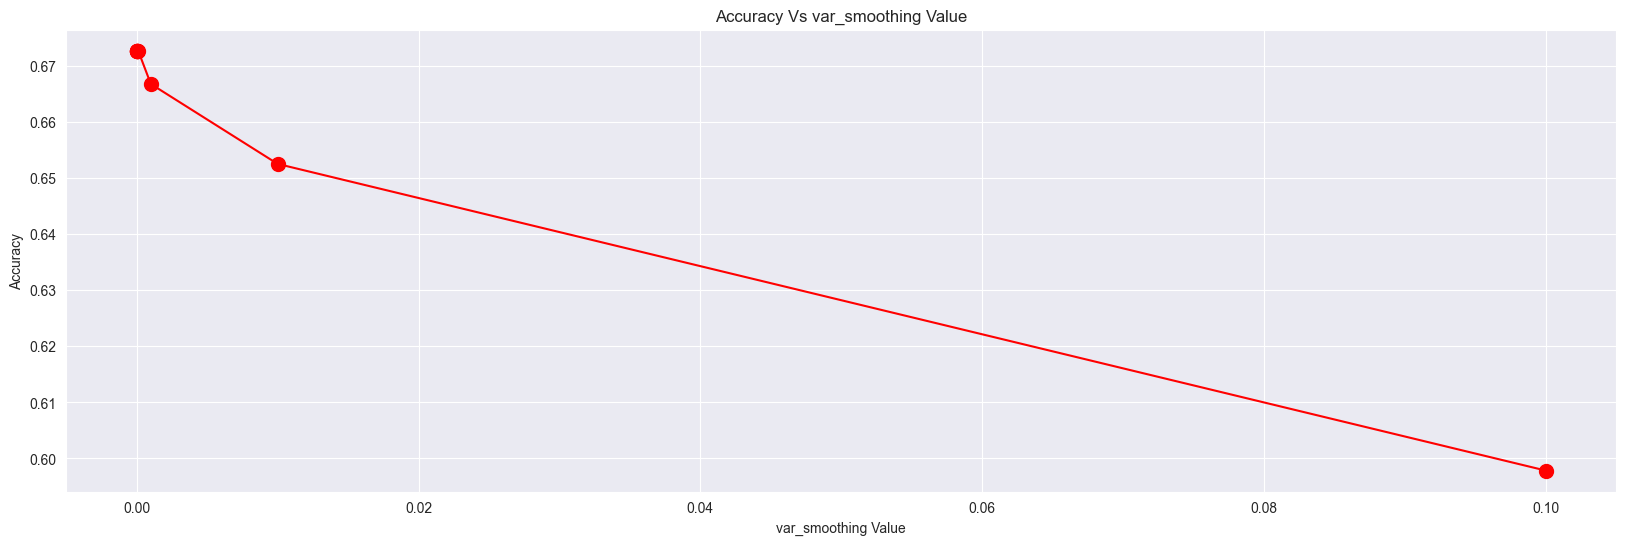

In [112]:
plt.figure(figsize=(20, 6))
plt.plot(xData, accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs var_smoothing Value')
plt.xlabel('var_smoothing Value')
plt.ylabel('Accuracy')